<a href="https://colab.research.google.com/github/RanganathJoshi/Fraud-Detection/blob/main/Number_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as ps

# The data has already been sorted into training and test sets for us
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [2]:
#Printing the shapes
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

(<matplotlib.image.AxesImage at 0x7f4848058410>,)

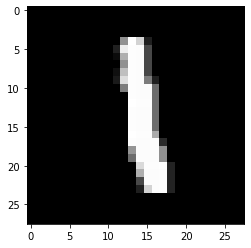

In [3]:
plt.imshow(x_train[6],cmap=plt.cm.gray),

In [4]:
#plotting its respective label
y_train[6]

1

In [5]:
label=[1,2,3,4,5,6,7,8,9]

In [6]:
#Size of Each image???
x_train[6].shape

(28, 28)

Text(0.5, 1.0, '1')

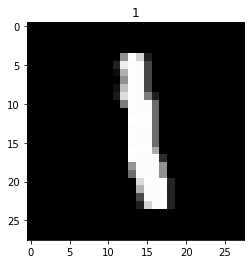

In [7]:
plt.imshow(x_train[6],cmap=plt.cm.gray)
plt.title(y_train[6])

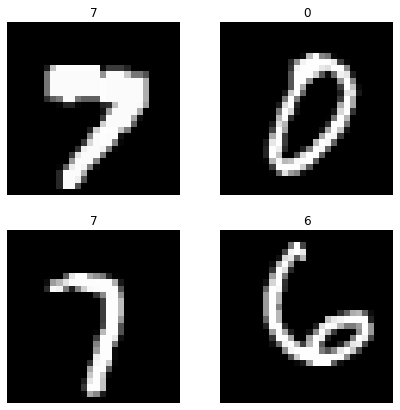

In [8]:
#Displaying Random Image
import random
plt.figure(figsize=(7, 7))
for k in range(4):
  ax = plt.subplot(2, 2, k + 1)
  i=random.choice(range(len(x_train)))
  plt.imshow(x_train[i],cmap=plt.cm.gray)
  plt.title(y_train[i])
  plt.axis(False)

In [9]:
# Set random seed
tf.random.set_seed(42)

#Defining Model
model=tf.keras.Sequential([
 tf.keras.layers.Flatten(input_shape=(28,28)),
 tf.keras.layers.Dense(4,activation='relu'),  
 tf.keras.layers.Dense(4,activation='relu'),  
 tf.keras.layers.Dense(10,activation='softmax')                           
])

#Compile
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

history=model.fit(x_train,tf.one_hot(y_train,depth=10),epochs=20,validation_data=(x_test,tf.one_hot(y_test,depth=10)))

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 2.4993 - accuracy: 0.1116 - val_loss: 2.3002 - val_accuracy: 0.1141
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.9961 - accuracy: 0.2120 - val_loss: 1.8645 - val_accuracy: 0.2302
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.8145 - accuracy: 0.2559 - val_loss: 1.7891 - val_accuracy: 0.2805
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7783 - accuracy: 0.2692 - val_loss: 1.7779 - val_accuracy: 0.2855
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7456 - accuracy: 0.2859 - val_loss: 1.7218 - val_accuracy: 0.3233
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7096 - accuracy: 0.3090 - val_loss: 1.6834 - val_accuracy: 0.3064
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6440 - accuracy: 0.3339 - val_loss: 1.6045 - val_accuracy:

> Hmmm,Acucuracy is 55%
> what can be done to improve it!?


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [11]:
#How about if we normalize the values i,e scaling it between 0 and 1
#Let's get the maximum and the minimun value of our Data
x_train.max(),x_train.min()

(255, 0)

> Max-255,min-0

In [12]:
#Normalizing the input data of both x_test and x_train
norm_x_train=x_train/255.0
norm_x_test=x_test/255.0
norm_x_train.min(),norm_x_test.max()

(0.0, 1.0)

In [31]:
y_prob=model.predict(x_test)
label[tf.argmax(y_prob[0])]

8

> AS you Can see,the data is been scaled to the values 0 and 1 

In [13]:
#Lets feed this data into the model and check the acuuracy



In [79]:
# Set random seed
tf.random.set_seed(42)

#Defining Model
model_2=tf.keras.Sequential([
 tf.keras.layers.Flatten(input_shape=(28,28)),
 tf.keras.layers.Dense(4,activation='relu'),  
 tf.keras.layers.Dense(4,activation='relu'),  
 tf.keras.layers.Dense(10,activation='softmax')                           
])

#Compile
model_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

history_1=model_2.fit(norm_x_train,tf.one_hot(y_train,depth=10),epochs=40,validation_data=(norm_x_test,tf.one_hot(y_test,depth=10)))

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0472 - accuracy: 0.6442 - val_loss: 0.7344 - val_accuracy: 0.7569
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6970 - accuracy: 0.7717 - val_loss: 0.6814 - val_accuracy: 0.7860
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6434 - accuracy: 0.8000 - val_loss: 0.6276 - val_accuracy: 0.8119
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6126 - accuracy: 0.8127 - val_loss: 0.6022 - val_accuracy: 0.8223
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5921 - accuracy: 0.8207 - val_loss: 0.5926 - val_accuracy: 0.8231
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5752 - accuracy: 0.8272 - val_loss: 0.5817 - val_accuracy: 0.8277
Epoch 7/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5625 - accuracy: 0.8316 - val_loss: 0.5828 - val_accuracy:

> F!!
>Accuracy is almost 86% WITH just 20 epochs!!
> Noiceeeeeeeeeeeeeee

In [24]:
import pandas as pd
#Now,lets visualize the cost function of norm and non_norm data
norm_hist=pd.DataFrame(history_1.history)
norm_hist.head()
non_norm_hist=pd.DataFrame(history.history)
non_norm_hist.head()

,loss,accuracy,val_loss,val_accuracy
0,2.499331,0.111617,2.300165,0.1141
1,1.996063,0.211983,1.864512,0.2302
2,1.814517,0.255933,1.789140,0.2805
3,1.778272,0.269183,1.777872,0.2855
4,1.745621,0.285900,1.721843,0.3233


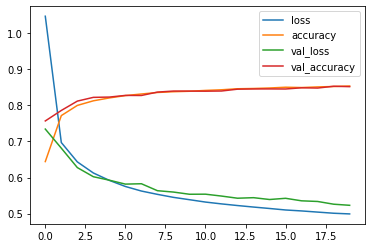

In [25]:
norm_hist.plot(label='Stats of normalized Data')

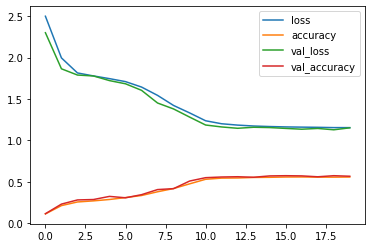

In [26]:
non_norm_hist.plot(label='Stats of nom_normalized Data')

* As you can see,non Norm Data loss is higher than the norm one

In [94]:
#plot the random image ,and also also to show whether the predictes image is correct or not!
def plot_random_image(model_2,image,y_test,labels):
  import random
  i=random.choice(range(len(image)))
  prob=model_2.predict(image[i].reshape(1, 28, 28))
  pred=model_2.predict(image[i].reshape(1, 28, 28)).argmax()
  true=y_test[i]

  #Plottig the Image
  plt.imshow(image[i],cmap=plt.cm.gray)

  #Change the color of the labels,if True
  if pred==true:
    color='green'
  else:
    color='red'


  #providing title and axis to the image
  plt.xlabel('predicted: {} with probablity of {:2.0f}% and True label is {}'.format(pred,tf.reduce_max(prob)*100,true),color=color)

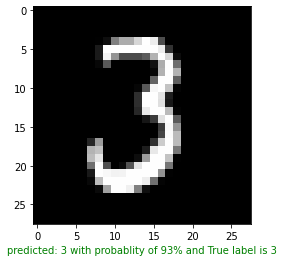

In [100]:
plot_random_image(model_2,norm_x_test,y_test,label)

#Accuracy bari 85% ide ashte :(